In [2]:
#https://www.kaggle.com/chaman7/census-income-prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# load data

In [3]:
df = pd.read_csv('/home/niloofar/adult.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.columns
df.shape

(32561, 15)

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [7]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
df = df.replace('?', np.NaN)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
df = df.dropna()
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [10]:
df.shape

(30162, 15)

In [11]:
df['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

In [12]:
df['sex'].value_counts()

Male      20380
Female     9782
Name: sex, dtype: int64

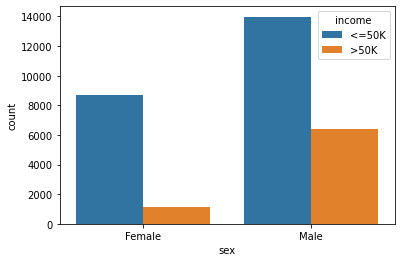

In [13]:
sns.countplot(df['sex'],hue=df['income'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

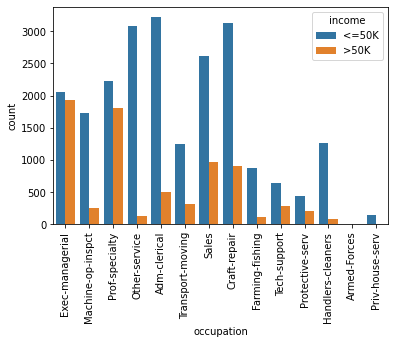

In [14]:
sns.countplot(df['occupation'],hue=df['income'])
plt.xticks(rotation=90)

In [15]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

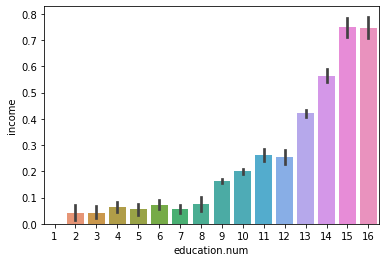

In [16]:
sns.barplot(x="education.num",y="income",data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

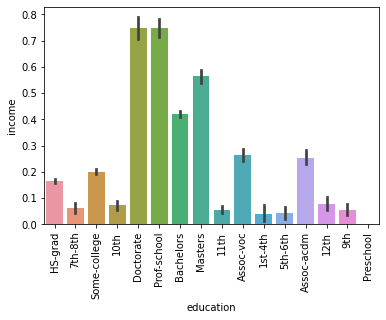

In [17]:
sns.barplot(x="education",y="income",data=df)
plt.xticks(rotation=90)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])


In [19]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38,0
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38,0
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,38,0


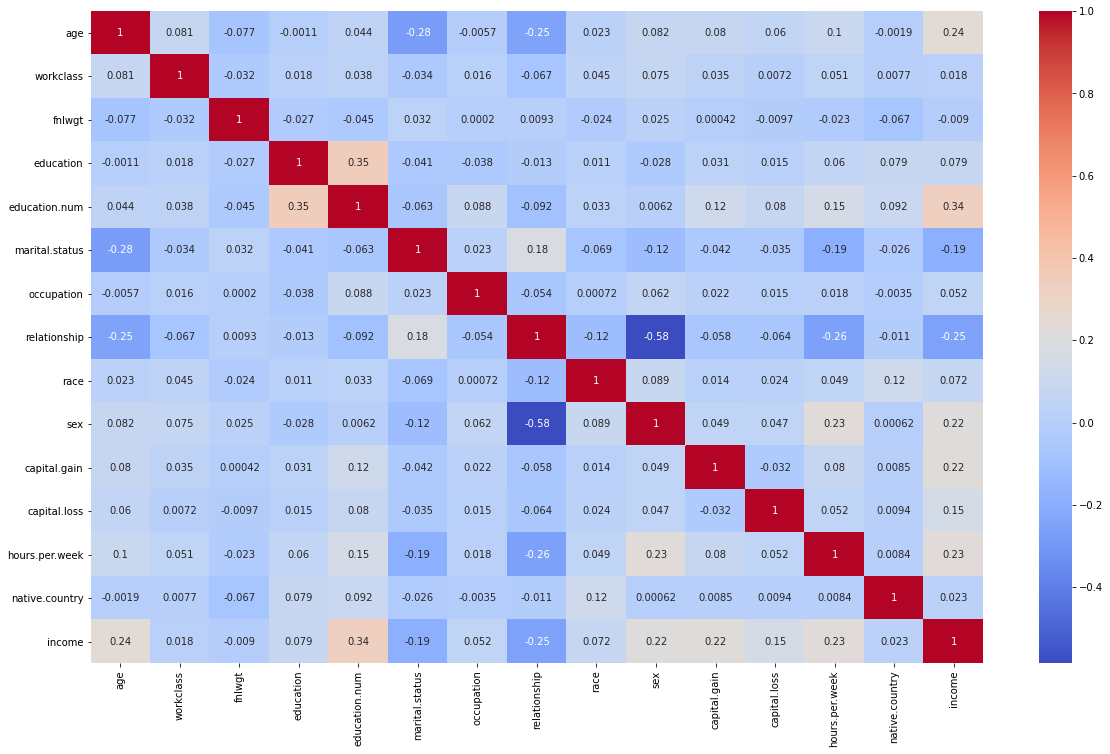

In [20]:
corrmat = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

In [20]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)
print(X_train.shape)

(21113, 14)


In [143]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

# Normal Accuracy

In [367]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression:', acc * 100)

Logistic Regression: 81.83224665708919


In [368]:
print(X_train.shape)
genders = X_test_np[:,9]
print(genders.shape)
print(y_pred.shape)

(21113, 14)
(9049,)
(9049,)


In [369]:
temp1 = genders == 0
temp2 = y_pred==y_test_np

f_acc = np.sum((temp1 * temp2).astype(float))*100/np.sum(temp1)

temp1 = genders == 1


m_acc = np.sum((temp1 * temp2).astype(float))*100/np.sum(temp1)
print('Accuracy of non-private classifier on WOMEN in validation set:', f_acc)
print('Accuracy of non-private classifier on MEN in validation set:', m_acc)

Accuracy of non-private classifier on WOMEN in validation set: 89.48672566371681
Accuracy of non-private classifier on MEN in validation set: 78.35796915167096


# DP  Accuracy

In [370]:
(n,d) = X_test_np.shape
from diffprivlib.models import LogisticRegression as DPLogisticRegression



In [371]:
acc = 0
f_acc = 0
m_acc = 0
for i in range(50):
    
    modelDP = DPLogisticRegression(epsilon= 1, max_iter=1000, tol=1e-5,  data_norm=np.sqrt(d+1))
    modelDP.fit(X_train, y_train)
    y_predDP = modelDP.predict(X_test)
    acc += np.mean((y_predDP ==y_test).astype(float))*100
    
    temp1 = genders == 0
    temp2 = y_predDP==y_test_np
    f_acc += np.sum((temp1 * temp2).astype(float))*100/np.sum(temp1)
    temp1 = genders == 1
    m_acc += np.sum((temp1 * temp2).astype(float))*100/np.sum(temp1)
print('Accuracy of non-private classifier on WOMEN in validation set:', f_acc/50)
print('Accuracy of non-private classifier on MEN in validation set:', m_acc/50)
print('Accuracy of private logistic regression (on validation set): {}%'.format(acc/50))

/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.87298. Got 14.940570
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.87298. Got 14.940570
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.87298. Got 1

/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.87298. Got 14.940570
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.87298. Got 14.940570
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.87298. Got 1

/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.87298. Got 14.940570
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.87298. Got 14.940570
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.87298. Got 1

Accuracy of non-private classifier on WOMEN in validation set: 89.55115044247785
Accuracy of non-private classifier on MEN in validation set: 78.22300771208225
Accuracy of private logistic regression (on validation set): 81.75953143993812%


In [375]:
f_1 = np.sum((y_pred== 1)[f_valid_indices].astype(float))
f_all = len(f_valid_indices)

m_1 = np.sum((y_pred== 1)[m_valid_indices].astype(float))
m_all = len(m_valid_indices)

print('Difference in demographic parity for NON-Private classifier is', (f_1/f_all - m_1/m_all))

f_1_DP = np.sum((y_predDP== 1)[f_valid_indices].astype(float))
f_all = len(f_valid_indices)

m_1_DP = np.sum((y_predDP== 1)[m_valid_indices].astype(float))
m_all = len(m_valid_indices)

print('Difference in demographic parity for DP (Private) classifier is', (f_1_DP/f_all - m_1_DP/m_all))

Difference in demographic parity for NON-Private classifier is -0.1770354551038515
Difference in demographic parity for DP (Private) classifier is -0.17342778169574813


In [376]:
temp1 = (y_pred == 1)
temp2 = (y_test_np == 1)
f_1_real1 = np.sum((temp1&temp2)[f_valid_indices].astype(float))
f_real1 = np.sum((y_test_np==1)[f_valid_indices].astype(float))

m_1_real1 = np.sum((temp1&temp2)[m_valid_indices].astype(float))
m_real1 = np.sum((y_test_np==1)[m_valid_indices].astype(float))

print(f_1_real1, f_real1, m_1_real1, m_real1)

print('Difference in Equal opportunity for NON-Private classifier is', (f_1_real1/f_real1 - m_1_real1/m_real1))

71.0 335.0 972.0 1960.0
Difference in Equal opportunity for NON-Private classifier is -0.28397806883947607


In [377]:
temp1 = (y_predDP == 1)
temp2 = (y_test_np == 1)
f_1_real1 = np.sum((temp1&temp2)[f_valid_indices].astype(float))
f_real1 = np.sum((y_test_np==1)[f_valid_indices].astype(float))

m_1_real1 = np.sum((temp1&temp2)[m_valid_indices].astype(float))
m_real1 = np.sum((y_test_np==1)[m_valid_indices].astype(float))

print(f_1_real1, f_real1, m_1_real1, m_real1)

print('Difference in Equal opportunity for Private classifier is', (f_1_real1/f_real1 - m_1_real1/m_real1))

83.0 335.0 975.0 1960.0
Difference in Equal opportunity for Private classifier is -0.249687785561986


# Gaussian NB

In [339]:
from sklearn.naive_bayes import GaussianNB
import diffprivlib.models as models
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
acc = np.mean((y_pred==y_test).astype(float))*100
print('Accuracy of non-private logistic regression (on validation set): {}%'.format(acc))

Accuracy of non-private logistic regression (on validation set): 79.64415957564371%


In [340]:
temp1 = genders == 0
temp2 = y_pred==y_test_np

f_acc = np.sum((temp1 * temp2).astype(float))*100/np.sum(temp1)

temp1 = genders == 1


m_acc = np.sum((temp1 * temp2).astype(float))*100/np.sum(temp1)
print('Accuracy of non-private classifier on WOMEN in validation set:', f_acc)
print('Accuracy of non-private classifier on MEN in validation set:', m_acc)

Accuracy of non-private classifier on WOMEN in validation set: 89.52212389380531
Accuracy of non-private classifier on MEN in validation set: 75.16066838046272


In [341]:
gnbDP = models.GaussianNB(epsilon=0.5, bounds=[(1,10),(1,10),(1,10),(1,10),(1,10),(1,10),(1,10),(1,10),(1,10),(1,10),(1,10),(1,10),(1,10),(1,10)])
predsDP = gnbDP.fit(X_train, y_train).predict(X_test)

y_predDP = gnbDP.predict(X_test)
acc = np.mean((y_predDP==y_test).astype(float))*100
print('Accuracy of private logistic regression (on validation set): {}%'.format(acc))

Accuracy of private logistic regression (on validation set): 75.66581942756105%


In [342]:
temp1 = genders == 0
temp2 = y_predDP==y_test_np
f_acc = np.sum((temp1 * temp2).astype(float))*100/np.sum(temp1)
print(np.sum(temp1))
temp1 = genders == 1
m_acc = np.sum((temp1 * temp2).astype(float))*100/np.sum(temp1)
print(np.sum(temp1))
print('Accuracy of non-private classifier on WOMEN in validation set:', f_acc)
print('Accuracy of non-private classifier on MEN in validation set:', m_acc)

2825
6224
Accuracy of non-private classifier on WOMEN in validation set: 86.47787610619469
Accuracy of non-private classifier on MEN in validation set: 70.75835475578405


# remove gender

In [378]:
print(X_train_no.shape)

(21113, 13)


In [379]:
X_train_no = X_train.drop(9,axis=1)
X_test_no = X_test.drop(9, axis=1)

model = LogisticRegression()
model.fit(X_train_no, y_train)

y_pred = model.predict(X_test_no)
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression:', acc * 100)

Logistic Regression: 81.65543153939662


In [380]:
temp1 = genders == 0
temp2 = y_pred==y_test_np

f_acc = np.sum((temp1 * temp2).astype(float))*100/np.sum(temp1)

temp1 = genders == 1


m_acc = np.sum((temp1 * temp2).astype(float))*100/np.sum(temp1)
print('Accuracy of non-private classifier on WOMEN in validation set:', f_acc)
print('Accuracy of non-private classifier on MEN in validation set:', m_acc)

Accuracy of non-private classifier on WOMEN in validation set: 88.7433628318584
Accuracy of non-private classifier on MEN in validation set: 78.43830334190231


In [386]:
acc = 0
f_acc = 0
m_acc = 0
for i in range(50):
    
    modelDP = DPLogisticRegression(epsilon= 0.02, max_iter=1000, tol=1e-5,  data_norm=np.sqrt(d))
    modelDP.fit(X_train_no, y_train)
    y_predDP = modelDP.predict(X_test_no)
    acc += np.mean((y_predDP ==y_test).astype(float))*100
    
    temp1 = genders == 0
    temp2 = y_predDP==y_test_np
    f_acc += np.sum((temp1 * temp2).astype(float))*100/np.sum(temp1)
    temp1 = genders == 1
    m_acc += np.sum((temp1 * temp2).astype(float))*100/np.sum(temp1)
print('Accuracy of non-private classifier on WOMEN in validation set:', f_acc/50)
print('Accuracy of non-private classifier on MEN in validation set:', m_acc/50)
print('Accuracy of private logistic regression (on validation set): {}%'.format(acc/50))

/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.74166. Got 14.872318
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.74166. Got 14.872318
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.74166. Got 1

/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.74166. Got 14.872318
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.74166. Got 14.872318
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.74166. Got 1

/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.74166. Got 14.872318
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.74166. Got 14.872318
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.74166. Got 1

Accuracy of non-private classifier on WOMEN in validation set: 68.45522123893805
Accuracy of non-private classifier on MEN in validation set: 63.0318123393316
Accuracy of private logistic regression (on validation set): 64.72494198253952%


In [382]:
n = len(y_test)
f_valid_indices = [i for i in range(n) if X_test_np[i,9] == 0]
m_valid_indices = [i for i in range(n) if X_test_np[i,9] == 1]

In [383]:
f_1 = np.sum((y_pred== 1)[f_valid_indices].astype(float))
f_all = len(f_valid_indices)

m_1 = np.sum((y_pred== 1)[m_valid_indices].astype(float))
m_all = len(m_valid_indices)

print('Difference in demographic parity for NON-Private classifier is', (f_1/f_all - m_1/m_all))

f_1_DP = np.sum((y_predDP== 1)[f_valid_indices].astype(float))
f_all = len(f_valid_indices)

m_1_DP = np.sum((y_predDP== 1)[m_valid_indices].astype(float))
m_all = len(m_valid_indices)

print('Difference in demographic parity for DP (Private) classifier is', (f_1_DP/f_all - m_1_DP/m_all))

Difference in demographic parity for NON-Private classifier is -0.1432669426939964
Difference in demographic parity for DP (Private) classifier is -0.14616153286166025


In [384]:
temp1 = (y_pred == 1)
temp2 = (y_test_np == 1)
f_1_real1 = np.sum((temp1&temp2)[f_valid_indices].astype(float))
f_real1 = np.sum((y_test_np==1)[f_valid_indices].astype(float))

m_1_real1 = np.sum((temp1&temp2)[m_valid_indices].astype(float))
m_real1 = np.sum((y_test_np==1)[m_valid_indices].astype(float))

print(f_1_real1, f_real1, m_1_real1, m_real1)

print('Difference in Equal opportunity for NON-Private classifier is', (f_1_real1/f_real1 - m_1_real1/m_real1))

88.0 335.0 930.0 1960.0
Difference in Equal opportunity for NON-Private classifier is -0.21180322875418828


In [385]:
temp1 = (y_predDP == 1)
temp2 = (y_test_np == 1)
f_1_real1 = np.sum((temp1&temp2)[f_valid_indices].astype(float))
f_real1 = np.sum((y_test_np==1)[f_valid_indices].astype(float))

m_1_real1 = np.sum((temp1&temp2)[m_valid_indices].astype(float))
m_real1 = np.sum((y_test_np==1)[m_valid_indices].astype(float))

print(f_1_real1, f_real1, m_1_real1, m_real1)

print('Difference in Equal opportunity for Private classifier is', (f_1_real1/f_real1 - m_1_real1/m_real1))

87.0 335.0 941.0 1960.0
Difference in Equal opportunity for Private classifier is -0.22040054827901306


In [392]:
print(X)

       age  workclass  fnlwgt  education  education.num  marital.status  \
1       82          2  132870         11              9               6   
3       54          2  140359          5              4               0   
4       41          2  264663         15             10               5   
5       34          2  216864         11              9               0   
6       38          2  150601          0              6               5   
...    ...        ...     ...        ...            ...             ...   
32556   22          2  310152         15             10               4   
32557   27          2  257302          7             12               2   
32558   40          2  154374         11              9               2   
32559   58          2  151910         11              9               6   
32560   22          2  201490         11              9               4   

       occupation  relationship  race  sex  capital.gain  capital.loss  \
1               3        

# make f minority:


In [42]:
df_min = df.drop(df.query('sex == 0').sample(frac=.95).index)
print(df_min.shape)


X = df_min.iloc[:,0:-1]
y = df_min.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

print(X_train.shape)

(20869, 15)
(14608, 14)


In [43]:
n = len(y_test)
f_valid_indices = [i for i in range(n) if X_test_np[i,9] == 0]
m_valid_indices = [i for i in range(n) if X_test_np[i,9] == 1]

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

# Normal Accuracy

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression:', acc * 100)

Logistic Regression: 79.89139115157323


In [57]:
print(X_train.shape)
genders = X_test_np[:,9]
print(genders.shape)
print(y_pred.shape)

(14608, 14)
(6261,)
(6261,)


In [58]:
temp1 = genders == 0
temp2 = y_pred==y_test_np

f_acc = np.sum((temp1 * temp2).astype(float))*100/np.sum(temp1)

temp1 = genders == 1


m_acc = np.sum((temp1 * temp2).astype(float))*100/np.sum(temp1)
print('Accuracy of non-private classifier on WOMEN in validation set:', f_acc)
print('Accuracy of non-private classifier on MEN in validation set:', m_acc)

Accuracy of non-private classifier on WOMEN in validation set: 84.9673202614379
Accuracy of non-private classifier on MEN in validation set: 79.76424361493123


# DP  Accuracy

In [59]:
(n,d) = X_test_np.shape
from diffprivlib.models import LogisticRegression as DPLogisticRegression



In [61]:
acc = 0
f_acc = 0
m_acc = 0
for i in range(50):
    
    modelDP = DPLogisticRegression(epsilon= 0.05, max_iter=1000, tol=1e-5,  data_norm=np.sqrt(d+1))
    modelDP.fit(X_train, y_train)
    y_predDP = modelDP.predict(X_test)
    acc += np.mean((y_predDP ==y_test).astype(float))*100
    
    temp1 = genders == 0
    temp2 = y_predDP==y_test_np
    f_acc += np.sum((temp1 * temp2).astype(float))*100/np.sum(temp1)
    temp1 = genders == 1
    m_acc += np.sum((temp1 * temp2).astype(float))*100/np.sum(temp1)
print('Accuracy of non-private classifier on WOMEN in validation set:', f_acc/50)
print('Accuracy of non-private classifier on MEN in validation set:', m_acc/50)
print('Accuracy of private logistic regression (on validation set): {}%'.format(acc/50))

/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.87298. Got 12.813644
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.87298. Got 12.813644
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.87298. Got 1

/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.87298. Got 12.813644
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.87298. Got 12.813644
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)
/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.87298. Got 1

Accuracy of non-private classifier on WOMEN in validation set: 67.49019607843134
Accuracy of non-private classifier on MEN in validation set: 69.5091683038638
Accuracy of private logistic regression (on validation set): 69.4598306979716%


/home/niloofar/python-environments/py36/lib/python3.6/site-packages/diffprivlib/models/logistic_regression.py:225: PrivacyLeakWarning: Differential privacy is only guaranteed for data whose rows have a 2-norm of at most 3.87298. Got 12.813644
Translate and/or scale the data accordingly to ensure differential privacy is achieved.
  % (self.data_norm, max_norm), PrivacyLeakWarning)


In [62]:
f_1 = np.sum((y_pred== 1)[f_valid_indices].astype(float))
f_all = len(f_valid_indices)

m_1 = np.sum((y_pred== 1)[m_valid_indices].astype(float))
m_all = len(m_valid_indices)

print('Difference in demographic parity for NON-Private classifier is', (f_1/f_all - m_1/m_all))

f_1_DP = np.sum((y_predDP== 1)[f_valid_indices].astype(float))
f_all = len(f_valid_indices)

m_1_DP = np.sum((y_predDP== 1)[m_valid_indices].astype(float))
m_all = len(m_valid_indices)

print('Difference in demographic parity for DP (Private) classifier is', (f_1_DP/f_all - m_1_DP/m_all))

Difference in demographic parity for NON-Private classifier is -0.18052184855605632
Difference in demographic parity for DP (Private) classifier is -0.34462999345121154


In [63]:
print(len(f_valid_indices))
print(len(m_valid_indices))

153
6108


In [64]:
temp1 = (y_pred == 1)
temp2 = (y_test_np == 1)
f_1_real1 = np.sum((temp1&temp2)[f_valid_indices].astype(float))
f_real1 = np.sum((y_test_np==1)[f_valid_indices].astype(float))

m_1_real1 = np.sum((temp1&temp2)[m_valid_indices].astype(float))
m_real1 = np.sum((y_test_np==1)[m_valid_indices].astype(float))

print(f_1_real1, f_real1, m_1_real1, m_real1)

print('Difference in Equal opportunity for NON-Private classifier is', (f_1_real1/f_real1 - m_1_real1/m_real1))

1.0 17.0 1041.0 1896.0
Difference in Equal opportunity for NON-Private classifier is -0.4902271034996277


In [65]:
temp1 = (y_predDP == 1)
temp2 = (y_test_np == 1)
f_1_real1 = np.sum((temp1&temp2)[f_valid_indices].astype(float))
f_real1 = np.sum((y_test_np==1)[f_valid_indices].astype(float))

m_1_real1 = np.sum((temp1&temp2)[m_valid_indices].astype(float))
m_real1 = np.sum((y_test_np==1)[m_valid_indices].astype(float))

print(f_1_real1, f_real1, m_1_real1, m_real1)

print('Difference in Equal opportunity for Private classifier is', (f_1_real1/f_real1 - m_1_real1/m_real1))

0.0 17.0 1105.0 1896.0
Difference in Equal opportunity for Private classifier is -0.5828059071729957
